In [1]:
# pandas and numpy for working with data
import pandas as pd 
import numpy as np

# seaborn and matplotlib for visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
# load in the data frames 
daily_reports = pd.read_csv("../data/csse_covid_19_daily_reports_us.csv")
daily_reports['Last_Update'] = pd.to_datetime(daily_reports.loc[:,'Last_Update'], utc=True)
daily_reports['UTC_Date_Last_Update'] = daily_reports['Last_Update'].dt.date

In [83]:
def add_day_after_date(datetime): 
    if datetime > pd.to_datetime('2020-04-22'):
        return datetime - pd.DateOffset(1)
    return datetime

In [84]:
daily_reports['UTC_Adjusted_Date'] = daily_reports['UTC_Date_Last_Update'].apply(add_day_after_date)

In [85]:
data_between_dates(daily_reports[['Province_State','Last_Update','UTC_Date_Last_Update','UTC_Adjusted_Date']],
                   date_col = 'UTC_Date_Last_Update', start_date='2020-04-20',end_date='2020-04-25').sort_values(['Province_State','Last_Update'])

,Province_State,Last_Update,UTC_Date_Last_Update,UTC_Adjusted_Date
5692,Alabama,2020-04-20 23:36:47+00:00,2020-04-20,2020-04-20
5751,Alabama,2020-04-21 23:40:34+00:00,2020-04-21,2020-04-21
5810,Alabama,2020-04-22 23:40:26+00:00,2020-04-22,2020-04-22
5869,Alabama,2020-04-24 03:33:00+00:00,2020-04-24,2020-04-23
5928,Alabama,2020-04-25 06:32:46+00:00,2020-04-25,2020-04-24
...,...,...,...,...
5749,Wyoming,2020-04-20 23:36:47+00:00,2020-04-20,2020-04-20
5808,Wyoming,2020-04-21 23:40:34+00:00,2020-04-21,2020-04-21
5867,Wyoming,2020-04-22 23:40:26+00:00,2020-04-22,2020-04-22
5926,Wyoming,2020-04-24 03:33:00+00:00,2020-04-24,2020-04-23


In [87]:
daily_reports['Date_Offset'] = (daily_reports['UTC_Date_Last_Update'] > pd.to_datetime('2020-04-22')).astype(int)

data_between_dates(daily_reports[['Province_State','Last_Update','UTC_Date_Last_Update','Date_Offset']],
                   date_col = 'UTC_Date_Last_Update', start_date='2020-04-20',end_date='2020-04-25').sort_values(['Province_State','Last_Update'])

,Province_State,Last_Update,UTC_Date_Last_Update,Date_Offset
5692,Alabama,2020-04-20 23:36:47+00:00,2020-04-20,0
5751,Alabama,2020-04-21 23:40:34+00:00,2020-04-21,0
5810,Alabama,2020-04-22 23:40:26+00:00,2020-04-22,0
5869,Alabama,2020-04-24 03:33:00+00:00,2020-04-24,1
5928,Alabama,2020-04-25 06:32:46+00:00,2020-04-25,1
...,...,...,...,...
5749,Wyoming,2020-04-20 23:36:47+00:00,2020-04-20,0
5808,Wyoming,2020-04-21 23:40:34+00:00,2020-04-21,0
5867,Wyoming,2020-04-22 23:40:26+00:00,2020-04-22,0
5926,Wyoming,2020-04-24 03:33:00+00:00,2020-04-24,1


In [46]:
daily_reports['Times'] = daily_reports['Last_Update'].dt.time#pd.to_timedelta(daily_reports['Last_Update'].dt.time)
daily_reports['Times'].head()
daily_reports['hour']   = daily_reports['Last_Update'].dt.hour
daily_reports['minute'] = daily_reports['Last_Update'].dt.minute
daily_reports['timeInMinutes'] = daily_reports['hour']*60 + daily_reports['minute']

<AxesSubplot:>

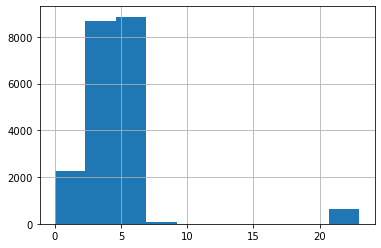

In [52]:
daily_reports['hour'].hist()

In [49]:
def plot_hist_of_times(df, col_name="timeInMinutes", bins_per_hour=4):
    """
    Takes a dataframe with column listing the time of day in minutes (e.g. 2:33pm = 14*60+33) and plots 
    a density histogram of the entries by time of day with bins_per_hour bins for each hour of the day. 
    """
    # Make a histogram of time of stops by where in the day they occurred
    ax = df[[col_name]].hist(figsize=(18,7),bins=24*bins_per_hour, density=True, range=(0,24*60))[0][0]
    ax.set_xticks(list(range(0,24*60,60)));
    hour_labels = ["12:00AM", "1:00AM", "2:00AM", "3:00AM", "4:00AM", "5:00AM", 
                    "6:00AM", "7:00AM", "8:00AM", "9:00AM", "10:00AM", "11:00AM", 
                    "12:00PM", "1:00PM", "2:00PM", "3:00PM", "4:00PM", "5:00PM", 
                    "6:00PM", "7:00PM", "8:00PM", "9:00PM", "10:00PM", "11:00PM"]
    ax.set_xticklabels(hour_labels);
    plt.xticks(rotation = 45);
    ax.set_title("Density of Time of Day")
    ax.set_xlim(0,24*60);

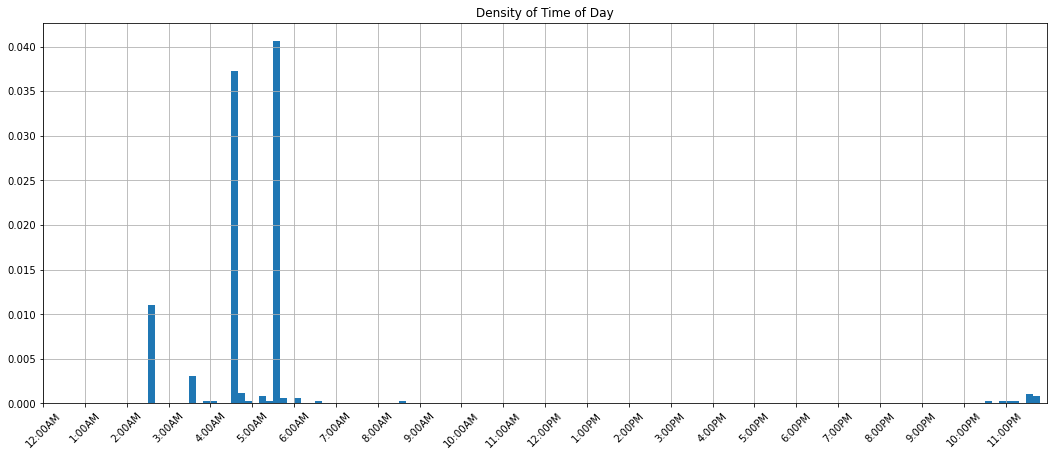

In [51]:
plot_hist_of_times(daily_reports, bins_per_hour=6)

In [ ]:
def standardize_dates(data): 
    

In [17]:
def data_between_dates(data, date_col='Date_Last_Update', start_date='2020-01-01', end_date='2021-04-03'):
    return data[(data[date_col] >= pd.to_datetime(start_date)) & (data[date_col] <= pd.to_datetime(end_date))]

In [25]:
data_between_dates(daily_reports, date_col='UTC_Date_Last_Update', start_date='2020-04-21',end_date='2020-04-25').sort_values(['Province_State','Last_Update'])

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,People_Tested,Mortality_Rate,UTC_Date_Last_Update
5751,Alabama,US,2020-04-21 23:40:34+00:00,32.3182,-86.9023,5404,183,NaN,5134.0,1.0,...,NaN,699.0,NaN,84000001.0,USA,1034.912902,13.146511,48526.0,3.441790,2020-04-21
5810,Alabama,US,2020-04-22 23:40:26+00:00,32.3182,-86.9023,5692,196,NaN,5397.0,1.0,...,NaN,730.0,NaN,84000001.0,USA,1039.903414,13.052029,48760.0,3.504380,2020-04-22
5869,Alabama,US,2020-04-24 03:33:00+00:00,32.3182,-86.9023,5899,202,NaN,5630.0,1.0,...,NaN,768.0,NaN,84000001.0,USA,1122.673413,13.168724,52641.0,3.463649,2020-04-24
5928,Alabama,US,2020-04-25 06:32:46+00:00,32.3182,-86.9023,6092,209,NaN,5817.0,1.0,...,NaN,769.0,NaN,84000001.0,USA,1127.962504,12.761367,52889.0,3.468304,2020-04-25
5752,Alaska,US,2020-04-21 23:40:34+00:00,61.3707,-152.4044,329,9,168.0,320.0,2.0,...,NaN,42.0,NaN,84000002.0,USA,1860.145312,12.765957,11119.0,2.735562,2020-04-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5984,Wisconsin,US,2020-04-25 06:32:46+00:00,44.2685,-89.6165,5356,263,NaN,5093.0,55.0,...,NaN,1353.0,NaN,84000055.0,USA,1158.144318,25.261389,59929.0,4.910381,2020-04-25
5808,Wyoming,US,2020-04-21 23:40:34+00:00,42.7560,-107.3025,443,2,237.0,441.0,56.0,...,NaN,52.0,NaN,84000056.0,USA,1532.660285,11.738149,7621.0,0.451467,2020-04-21
5867,Wyoming,US,2020-04-22 23:40:26+00:00,42.7560,-107.3025,447,6,254.0,441.0,56.0,...,NaN,52.0,NaN,84000056.0,USA,1533.062505,11.633110,7623.0,1.342282,2020-04-22
5926,Wyoming,US,2020-04-24 03:33:00+00:00,42.7560,-107.3025,453,7,275.0,446.0,56.0,...,NaN,52.0,NaN,84000056.0,USA,1521.800338,11.479029,7567.0,1.545254,2020-04-24


In [3]:
daily_reports.sample(5)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,People_Tested,Mortality_Rate
6384,Puerto Rico,US,2020-05-02 02:32:31,18.2208,-66.5901,1575,94,0.0,1481.0,72.0,53.691815,NaN,NaN,NaN,630.0,PRI,371.172370,NaN,10888.0,5.968254
8961,Florida,US,2020-06-16 04:33:22,27.7663,-81.6868,77326,2938,NaN,74388.0,12.0,360.028619,NaN,12298.0,NaN,84000012.0,USA,6658.913832,15.904094,1430184.0,3.799498
7342,Idaho,US,2020-05-19 02:32:23,44.2405,-114.4788,2455,74,1612.0,769.0,16.0,137.376089,NaN,213.0,NaN,84000016.0,USA,2052.079807,8.676171,36672.0,3.014257
7574,Idaho,US,2020-05-23 02:32:47,44.2405,-114.4788,2595,79,1720.0,796.0,16.0,145.210163,NaN,223.0,NaN,84000016.0,USA,2215.644087,8.593449,39595.0,3.044316
11307,North Carolina,US,2020-07-26 04:35:13,35.6301,-79.8064,111421,1811,78707.0,30903.0,37.0,1062.358006,NaN,NaN,NaN,84000037.0,USA,15055.581172,NaN,1579042.0,1.625367


## Timezone conversion

Since times are given in UTC, try converting to EST first and then extracting the date. 

Issue: times are inconsistent

In [4]:
daily_reports['US_Eastern_Last_Update'] = pd.to_datetime(daily_reports.loc[:,'Last_Update'], utc=True).dt.tz_convert('US/Eastern')
daily_reports['Date_Last_Update'] = daily_reports['US_Eastern_Last_Update'].dt.date
daily_reports[['Province_State','Last_Update','US_Eastern_Last_Update','Date_Last_Update']].sample(10)

,Province_State,Last_Update,US_Eastern_Last_Update,Date_Last_Update
1668,Puerto Rico,2021-01-30 05:30:40,2021-01-30 00:30:40-05:00,2021-01-30
16446,Guam,2020-10-23 04:30:40,2020-10-23 00:30:40-04:00,2020-10-23
14164,Virgin Islands,2020-09-13 04:32:00,2020-09-13 00:32:00-04:00,2020-09-13
14550,Nevada,2020-09-20 04:30:31,2020-09-20 00:30:31-04:00,2020-09-20
10774,Michigan,2020-07-17 04:35:02,2020-07-17 00:35:02-04:00,2020-07-17
3362,Wisconsin,2021-02-28 05:30:29,2021-02-28 00:30:29-05:00,2021-02-28
14513,Virginia,2020-09-19 04:30:26,2020-09-19 00:30:26-04:00,2020-09-19
8783,Connecticut,2020-06-13 03:33:25,2020-06-12 23:33:25-04:00,2020-06-12
13125,Wyoming,2020-08-26 04:30:22,2020-08-26 00:30:22-04:00,2020-08-26
11426,Ohio,2020-07-28 04:59:02,2020-07-28 00:59:02-04:00,2020-07-28


In [5]:
excluded_regions = ['Northern Mariana Islands', 'Puerto Rico', 'Virgin Islands', 'American Samoa', # territories
                    'Diamond Princess', 'Grand Princess', 'Guam', 'Recovered', # other 
                    'Alaska', 'Hawaii'] # non continuous states
continguous_US = list(set(list(daily_reports['Province_State'].unique())) - set(excluded_regions))
assert len(continguous_US) == 49 # 50 states + DC - Hawaii, Alaska

cont_daily_reports = daily_reports[daily_reports['Province_State'].isin(continguous_US)]
cont_daily_reports.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,People_Tested,Mortality_Rate,US_Eastern_Last_Update,Date_Last_Update
0,Alabama,US,2021-01-02 05:30:44,32.3182,-86.9023,365747,4872,202137.0,158738.0,1.0,...,NaN,1.332068,84000001.0,USA,38448.804196,NaN,NaN,NaN,2021-01-02 00:30:44-05:00,2021-01-02
3,Arizona,US,2021-01-02 05:30:44,33.7298,-111.4312,530267,9015,76934.0,444318.0,4.0,...,NaN,1.700087,84000004.0,USA,39551.860582,NaN,NaN,NaN,2021-01-02 00:30:44-05:00,2021-01-02
4,Arkansas,US,2021-01-02 05:30:44,34.9697,-92.3731,229442,3711,199247.0,26484.0,5.0,...,NaN,1.617402,84000005.0,USA,67979.497674,NaN,NaN,NaN,2021-01-02 00:30:44-05:00,2021-01-02
5,California,US,2021-01-02 05:30:44,36.1162,-119.6816,2365024,26363,NaN,2309915.0,6.0,...,NaN,1.125160,84000006.0,USA,83666.036710,NaN,NaN,NaN,2021-01-02 00:30:44-05:00,2021-01-02
6,Colorado,US,2021-01-02 05:30:44,39.0598,-105.3111,337161,4873,18102.0,314186.0,8.0,...,NaN,1.445304,84000008.0,USA,77173.289416,NaN,NaN,NaN,2021-01-02 00:30:44-05:00,2021-01-02


In [6]:
sample_group = cont_daily_reports[cont_daily_reports['Province_State']=='California']
ca_day_diffs = sample_group[['Date_Last_Update']].sort_values(by='Date_Last_Update').diff().rename(columns={'Date_Last_Update':'Days Diff'})#.value_counts()
sample_group_with_day_diffs = ca_day_diffs.merge(sample_group, how="inner", left_index=True, right_index=True)[['Days Diff','Province_State','Last_Update','Date_Last_Update']]
sample_group_with_day_diffs['Days Diff']
sample_group_with_day_diffs[sample_group_with_day_diffs['Days Diff']!=pd.Timedelta('1D')]

,Days Diff,Province_State,Last_Update,Date_Last_Update
5224,NaN,California,2020-04-12 23:18:15,2020-04-12
5992,"2 days, 0:00:00",California,2020-04-26 02:32:45,2020-04-25
5933,0:00:00,California,2020-04-25 06:32:46,2020-04-25
8607,"2 days, 0:00:00",California,2020-06-10 04:07:14,2020-06-10
8665,0:00:00,California,2020-06-11 03:33:54,2020-06-10
8723,"2 days, 0:00:00",California,2020-06-12 05:10:05,2020-06-12
8781,0:00:00,California,2020-06-13 03:33:25,2020-06-12
8955,"2 days, 0:00:00",California,2020-06-16 04:33:22,2020-06-16
14233,0:00:00,California,2020-09-15 03:30:30,2020-09-14
14291,"2 days, 0:00:00",California,2020-09-16 04:30:32,2020-09-16


In [7]:
def extract_unusual_day_diffs(data):
    sorted_data = data.sort_values('Date_Last_Update')
    day_diffs = sorted_data[['Date_Last_Update']].diff().rename(columns={'Date_Last_Update':'Days_Diff'})
    sorted_data = sorted_data.merge(day_diffs, how="inner", left_index=True, right_index=True)
    unusual_date_diffs = sorted_data[(sorted_data['Days_Diff']!=pd.Timedelta('1D')) & (~ sorted_data['Days_Diff'].isna())]
    return unusual_date_diffs

In [8]:
unusual_date_diff_data = cont_daily_reports.groupby('Province_State').apply(extract_unusual_day_diffs)
unusual_date_diff_data = unusual_date_diff_data.set_index(unusual_date_diff_data.index.droplevel('Province_State'))
unusual_date_diff_data.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,People_Tested,Mortality_Rate,US_Eastern_Last_Update,Date_Last_Update,Days_Diff
5987,Alabama,US,2020-04-26 02:32:45,32.3182,-86.9023,6274,209,NaN,5817.0,1.0,...,NaN,84000001.0,USA,1521.551870,13.923000,71344.0,3.468304,2020-04-25 22:32:45-04:00,2020-04-25,"2 days, 0:00:00"
5928,Alabama,US,2020-04-25 06:32:46,32.3182,-86.9023,6092,209,NaN,5817.0,1.0,...,NaN,84000001.0,USA,1127.962504,12.761367,52889.0,3.468304,2020-04-25 02:32:46-04:00,2020-04-25,0:00:00
8602,Alabama,US,2020-06-10 04:07:14,32.3182,-86.9023,21834,729,11395.0,9298.0,1.0,...,NaN,84000001.0,USA,5460.511892,9.742321,267739.0,3.403044,2020-06-10 00:07:14-04:00,2020-06-10,"2 days, 0:00:00"
8660,Alabama,US,2020-06-11 03:33:54,32.3182,-86.9023,22659,744,13508.0,7737.0,1.0,...,NaN,84000001.0,USA,5568.972005,9.682114,273057.0,3.383510,2020-06-10 23:33:54-04:00,2020-06-10,0:00:00
8718,Alabama,US,2020-06-12 05:10:05,32.3182,-86.9023,23370,755,13508.0,8582.0,1.0,...,NaN,84000001.0,USA,5686.630221,9.476910,278826.0,3.304881,2020-06-12 01:10:05-04:00,2020-06-12,"2 days, 0:00:00"


In [9]:
unusual_date_diff_data[['Province_State', 'Last_Update','US_Eastern_Last_Update','Date_Last_Update','Days_Diff']]

,Province_State,Last_Update,US_Eastern_Last_Update,Date_Last_Update,Days_Diff
5987,Alabama,2020-04-26 02:32:45,2020-04-25 22:32:45-04:00,2020-04-25,"2 days, 0:00:00"
5928,Alabama,2020-04-25 06:32:46,2020-04-25 02:32:46-04:00,2020-04-25,0:00:00
8602,Alabama,2020-06-10 04:07:14,2020-06-10 00:07:14-04:00,2020-06-10,"2 days, 0:00:00"
8660,Alabama,2020-06-11 03:33:54,2020-06-10 23:33:54-04:00,2020-06-10,0:00:00
8718,Alabama,2020-06-12 05:10:05,2020-06-12 01:10:05-04:00,2020-06-12,"2 days, 0:00:00"
...,...,...,...,...,...
9007,Wyoming,2020-06-16 04:33:22,2020-06-16 00:33:22-04:00,2020-06-16,"2 days, 0:00:00"
14285,Wyoming,2020-09-15 03:30:30,2020-09-14 23:30:30-04:00,2020-09-14,0:00:00
14343,Wyoming,2020-09-16 04:30:32,2020-09-16 00:30:32-04:00,2020-09-16,"2 days, 0:00:00"
3711,Wyoming,2021-03-06 04:30:38,2021-03-05 23:30:38-05:00,2021-03-05,0:00:00


In [10]:
unusual_date_diff_data['Date_Last_Update'].unique()

array([datetime.date(2020, 4, 25), datetime.date(2020, 6, 10),
       datetime.date(2020, 6, 12), datetime.date(2020, 6, 16),
       datetime.date(2020, 9, 14), datetime.date(2020, 9, 16),
       datetime.date(2021, 3, 5), datetime.date(2021, 3, 7)], dtype=object)